In [5]:
import keras
import numpy as np
from scipy.io import loadmat
import h5py
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices()) 

/home/maria/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/maria/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/maria/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/maria/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2148536374902237412
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4993419825710298545
physical_device_desc: "device: XLA_CPU device"
]


/home/maria/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/maria/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/maria/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/maria/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [6]:
dat=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_3/data_full.mat')['data']
stim_dat=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')['data']['stim_full'][0][0]

In [7]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
neural_dat=np.array(hf['CellResp'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(neural_dat, stim_dat.flatten(), test_size=0.33)

In [21]:
X_train=X_train[:,1000:1500]
X_test=X_test[:,1000:1500]

In [22]:
model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)


Epoch 1/10
1929/1929 [==============================] - 2s 947us/step - loss: 0.8055 - accuracy: 0.6905
Epoch 2/10
1929/1929 [==============================] - 1s 755us/step - loss: 0.4312 - accuracy: 0.8564
Epoch 3/10
1929/1929 [==============================] - 1s 749us/step - loss: 0.2958 - accuracy: 0.8994
Epoch 4/10
1929/1929 [==============================] - 1s 755us/step - loss: 0.1968 - accuracy: 0.9311
Epoch 5/10
1929/1929 [==============================] - 1s 750us/step - loss: 0.1462 - accuracy: 0.9492
Epoch 6/10
1929/1929 [==============================] - 2s 805us/step - loss: 0.1069 - accuracy: 0.9611
Epoch 7/10
1929/1929 [==============================] - 2s 804us/step - loss: 0.1343 - accuracy: 0.9570
Epoch 8/10
1929/1929 [==============================] - 2s 817us/step - loss: 0.1312 - accuracy: 0.9533
Epoch 9/10
1929/1929 [==============================] - 2s 785us/step - loss: 0.0653 - accuracy: 0.9803
Epoch 10/10
951/951 [==============================] - 0s 127us/

In [23]:
accuracy

0.8622502684593201

In [24]:
beh_dat=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')['data']['Behavior_full'][0][0]

In [25]:
print(beh_dat.shape)

(5, 2880)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(neural_dat, beh_dat.T, test_size=0.33)

In [32]:
model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(5, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=5, batch_size=10)
# evaluate the keras model
prediction = model.predict(X_test)

Epoch 1/5
1929/1929 [==============================] - 65s 34ms/step - loss: 0.4938 - mse: 0.4938 - mae: 0.3429
Epoch 2/5
1929/1929 [==============================] - 67s 35ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.0936
Epoch 3/5
1929/1929 [==============================] - 69s 36ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0580
Epoch 4/5
1929/1929 [==============================] - 65s 34ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0446
Epoch 5/5
1929/1929 [==============================] - 70s 36ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0449


In [33]:
print(prediction)

[[-0.00244388  0.02537295 -0.01734602  0.01020653 -0.00412088]
 [ 0.01435807  0.04260797 -0.00824916  0.0140407  -0.00285769]
 [ 0.00953952  0.03592337 -0.00597703  0.02849687 -0.0169417 ]
 ...
 [ 0.00512734  0.05537451 -0.03585672 -0.00075238 -0.03391961]
 [ 0.10167554  0.02954373  0.01264942  0.07770355  0.00087133]
 [ 0.01510015  0.03979275  0.01493585  0.04159183 -0.03592742]]


(951, 5)
(951, 5)
[[1.         0.78081052]
 [0.78081052 1.        ]]


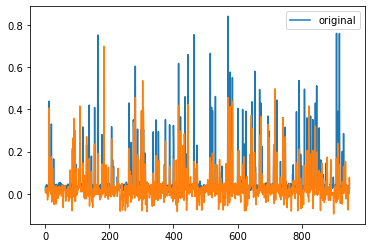

In [51]:
#### import matplotlib.pyplot as plt
print(y_test.shape)
print(prediction.shape)
#plt.plot(X_test)
plt.plot(y_test[:,3],label='original')
plt.plot(prediction[:,3])
plt.legend()
print(np.corrcoef(y_test[:,4],prediction[:,4]))